In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting for Jupyter
%matplotlib inline

In [30]:
# Load heart disease dataset
print("Step 1: Loading the heart disease dataset")
df = pd.read_csv('heart.csv')

# Display the first few rows of the dataframe
df.head()

Step 1: Loading the heart disease dataset


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [31]:
# Display basic information
print("Dataset basic info:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

Dataset basic info:
Shape: (1025, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [32]:
print("Step 2: Checking for missing values")
missing_values = df.isnull().sum()
print(missing_values)

Step 2: Checking for missing values
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [33]:
print("Step 3: Basic statistics to identify inconsistencies")
df.describe()

Step 3: Basic statistics to identify inconsistencies


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [34]:
print("Step 4: Handling outliers")

# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

Step 4: Handling outliers


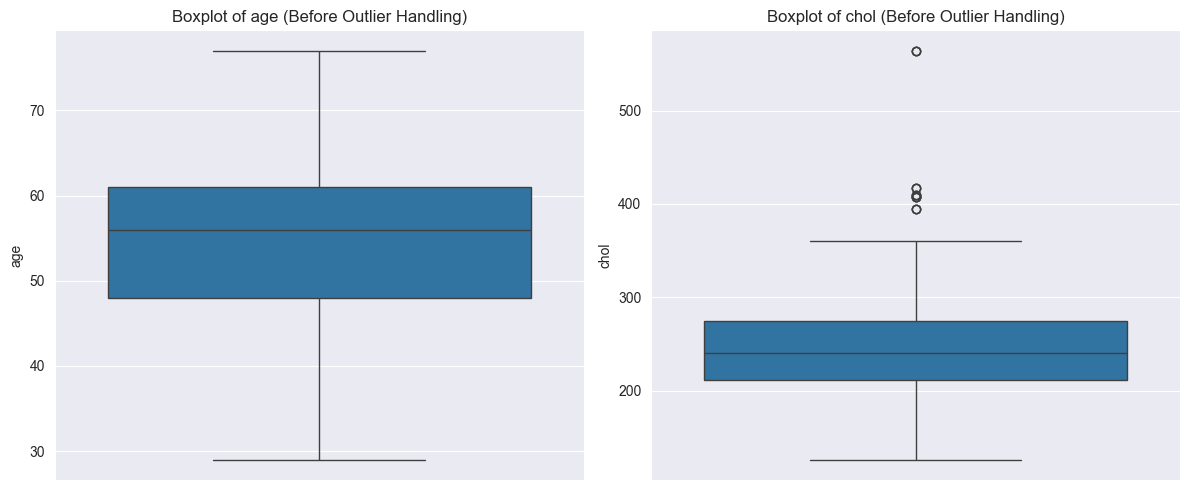

In [35]:
# Visualize the distribution of numeric columns before outlier handling
numeric_cols = ['age', 'chol']
plt.figure(figsize=(12, 5))

for i, col in enumerate(numeric_cols):
    plt.subplot(1, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col} (Before Outlier Handling)')
    
plt.tight_layout()
plt.show()

In [36]:
# Check for outliers in age and cholesterol
for col in numeric_cols:
    outliers, lower_bound, upper_bound = detect_outliers(df, col)
    print(f"\nOutliers in {col}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    
    # If there are outliers, display a few examples
    if len(outliers) > 0:
        print(outliers[[col]].head())
    else:
        print("No outliers found")
    
    # Handle outliers by capping
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


Outliers in age:
Number of outliers: 0
Lower bound: 28.5, Upper bound: 80.5
No outliers found

Outliers in chol:
Number of outliers: 16
Lower bound: 115.0, Upper bound: 371.0
     chol
123   417
158   564
179   409
192   564
255   394


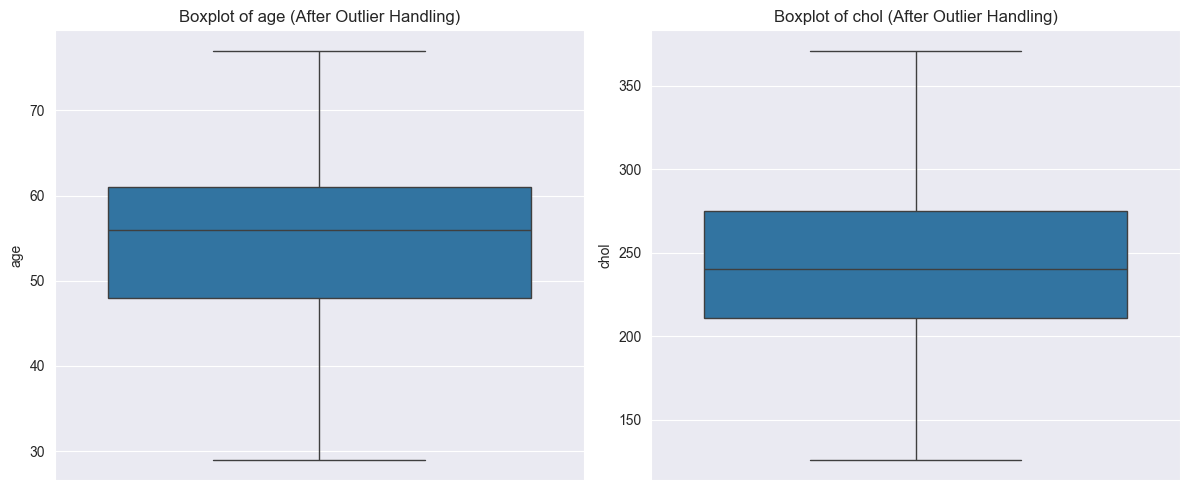

In [37]:
# Visualize the distribution after outlier handling
plt.figure(figsize=(12, 5))

for i, col in enumerate(numeric_cols):
    plt.subplot(1, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col} (After Outlier Handling)')
    
plt.tight_layout()
plt.show()

Step 5: Applying log transformation to cholesterol values


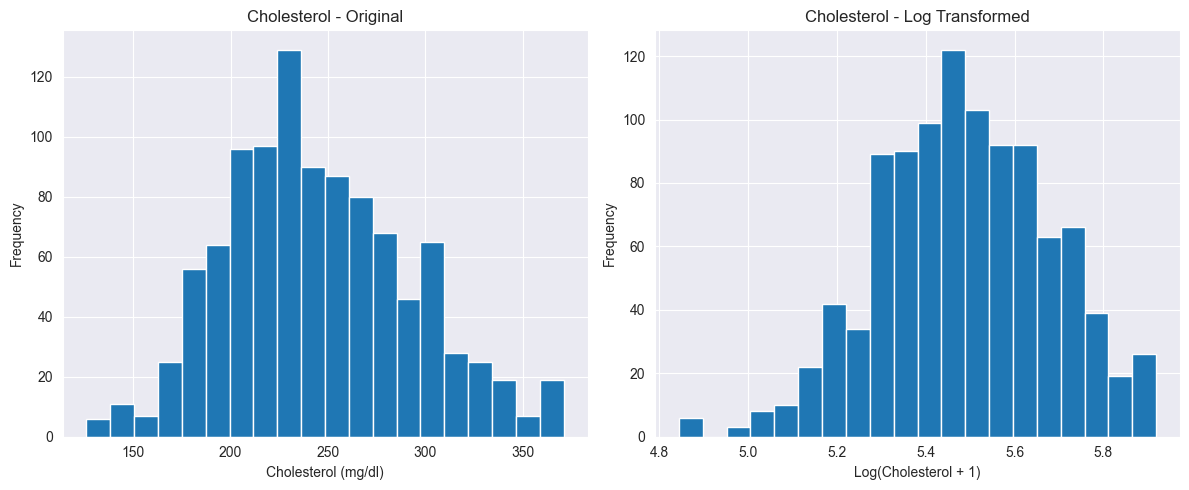

Log transformation applied to cholesterol to make distribution more normal.
Before transformation - Skewness: 0.3438
After transformation - Skewness: -0.1855


In [38]:
print("Step 5: Applying log transformation to cholesterol values")

# Apply log transformation to cholesterol
df['log_chol'] = np.log1p(df['chol'])

# Visualize the transformation
plt.figure(figsize=(12, 5))

# Original distribution
plt.subplot(1, 2, 1)
plt.hist(df['chol'], bins=20)
plt.title('Cholesterol - Original')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Frequency')

# Log-transformed distribution
plt.subplot(1, 2, 2)
plt.hist(df['log_chol'], bins=20)
plt.title('Cholesterol - Log Transformed')
plt.xlabel('Log(Cholesterol + 1)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Log transformation applied to cholesterol to make distribution more normal.")
print(f"Before transformation - Skewness: {df['chol'].skew():.4f}")
print(f"After transformation - Skewness: {df['log_chol'].skew():.4f}")

In [39]:
print("Step 6: Creating new features")
df['age_category'] = pd.cut(df['age'], 
                           bins=[0, 40, 55, 70, 100], 
                           labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])

# Count distribution of age categories
print("\nAge category distribution:")
print(df['age_category'].value_counts())

Step 6: Creating new features

Age category distribution:
age_category
Senior         499
Middle-aged    438
Young           68
Elderly         20
Name: count, dtype: int64


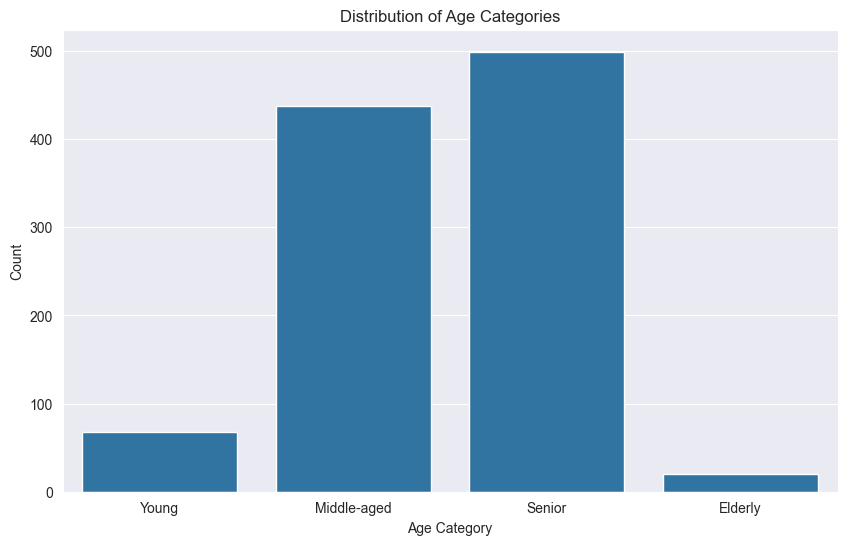

In [40]:
# Visualize age category distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='age_category', data=df, order=['Young', 'Middle-aged', 'Senior', 'Elderly'])
plt.title('Distribution of Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

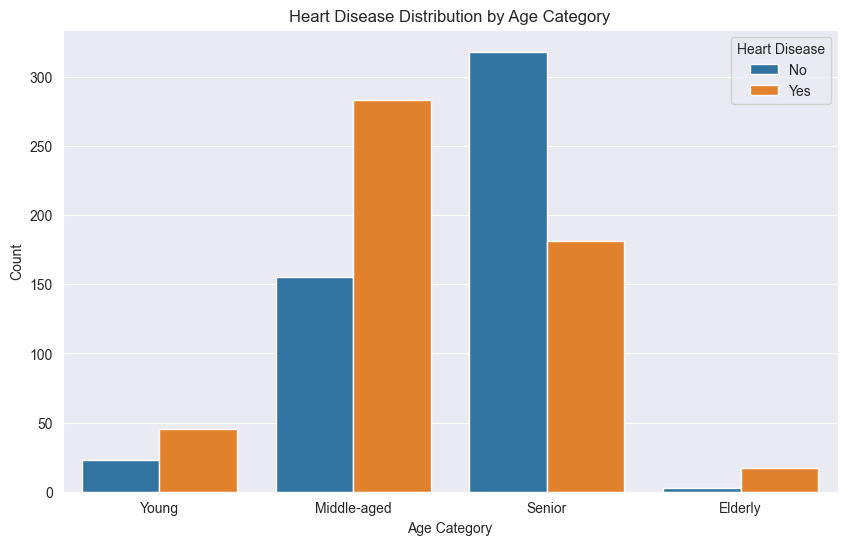

In [41]:
# Visualize target distribution by age category
plt.figure(figsize=(10, 6))
sns.countplot(x='age_category', hue='target', data=df, order=['Young', 'Middle-aged', 'Senior', 'Elderly'])
plt.title('Heart Disease Distribution by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

In [42]:
print("Saving preprocessed dataset")
df.to_csv('heart_preprocessed.csv', index=False)
print("Preprocessed dataset saved as 'heart_preprocessed.csv'")

Saving preprocessed dataset
Preprocessed dataset saved as 'heart_preprocessed.csv'
